# Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.



## Goal

In this assignment, you will be asked to find insights from the data by using **pandas** to analyze and manipulate the data and **matplotlib** and **seaborn** for data visualization. You will get a bonus point if you can apply a logistic regression model to predict which passengers are more likely to survive in a separate test set. 

In [ ]:
# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# load data
titanic = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv')
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Description of the data set
Here's a brief description of each column in the data.

- PassengerID: A column added by Kaggle to identify each row and make submissions easier
- Survived: Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- Pclass: The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- Sex: The passenger's sex
- Age: The passenger's age in years
- SibSp: The number of siblings or spouses the passenger had aboard the Titanic
- Parch: The number of parents or children the passenger had aboard the Titanic
- Ticket: The passenger's ticket number
- Fare: The fare the passenger paid
- Cabin: The passenger's cabin number
- Embarked: The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [ ]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Green, Mr. George Henry",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### **Question 1: Find the number of missing values for each column.**
The first step in data analysis is to identify columns with missing data. Can you find the columns in this data with missing value as well as the number of records with missing value for each column?  

Hint: you will need [isna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isna.html) function.

# **Q1 Answer:**

When applied to a dataframe, Pandas isna() function return boolean dataframe with True with the element is missing value and False when it is not a missing value.We can use Pandas’ sum() function to get the counts of missing values per each column in the dataframe.

Result shows that *177* values are missing from the "Age" column, *687* values are missing from the "Cabin" Column and 2 values are missing from the "Embarked" Column.

In [ ]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### **Question 2: Impute missing values.**
Now we've identified the following columns with missing values: _Age_, _Cabin_ and _Embarked_. As the next step, we want to impute those missing values. There are three ways to impute the missing values:
- A constant value that has meaning within the domain.
- The mean, median or mode value based on non-missing values of that column.
- A random value drawn from other non-missing values of that column.

Please write code to impute the missing values as follows:
- the missing values of column _age_ with the mean of that column.
- the missing values of column _Cabin_ with a constant value 'other'.
- the missing values of column _Embarked_ with the [mode](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html) of that column.

## Q2 Answer:

Using the method found in this blog : https://vitalflux.com/imputing-missing-data-sklearn-simpleimputer/

I replaced the missing values as indicated and checked that there are no missing values left

In [ ]:
# Replace missing 'Age' values with mean
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
 
titanic.Age = imputer.fit_transform(titanic['Age'].values.reshape(-1,1))[:,0]     #I dont understand the reshape part of this code
 
 # Replace missing 'Cabin' values with value 'other'
imputer = SimpleImputer(missing_values=np.NaN, strategy='constant', fill_value='other')
titanic.Cabin = imputer.fit_transform(titanic['Cabin'].values.reshape(-1,1))[:,0]

# Replace missing 'Embarked' values with mode
imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
 
titanic.Embarked = imputer.fit_transform(titanic['Embarked'].values.reshape(-1,1))[:,0] 

titanic.isna().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### **Question 3: What's the name of the person who has the 16th most expensive ticket?**

In [ ]:
# Find the 16th most expensive ticket

fare_sorted_desc = titanic.sort_values('Fare', ascending=False)

fare_sorted_desc.iloc[15, 3] # display the name only by selecting the 4th column. Remember that the index starts from zero

'Farthing, Mr. John'

### **Question 4: Out of all the females who survived, what's the name who has the 6th most expensive ticket?**

In [ ]:
# Find the 6th most expensive female ticket

female_fare= titanic.loc[(titanic['Sex'] == 'female'), :]

female_fare_sorted_desc = female_fare.sort_values('Fare', ascending=False)

female_fare_sorted_desc.iloc[5, 3] # display the name only by selecting the 4th column. Remember that the index starts from zero

'Baxter, Mrs. James (Helene DeLaudeniere Chaput)'

### **Question 5: Examine the survival rate**
Calculate the survival rate for different gender and Pclass combination and use a couple of sentences to describe your findings. Hint: pivot_table is your friend.

### **Q5 Answer: **

Both Sex and Pclass are both predictors of Survival but Sex is the stronger predictor. Female passengers, regardless of Pclass, are more likely to survive than male passengers. For a particular Sex, 1st class passengers are most likely to survive and 3rd class passengers are least likley to survive. The most likely to survive are the 1st class females (like Rose) with a survival rate of 97%, the least likely to survive are the 3rd class men (like Jack) with a survival rate of 14%

In [ ]:

pivot = pd.pivot_table(titanic, values='Survived', 
                                index='Sex', 
                                columns='Pclass', 
                                aggfunc=[np.sum,'count'])
            
pivot

sum         count          
Pclass   1   2   3     1    2    3
Sex                               
female  91  70  72    94   76  144
male    45  17  47   122  108  347

In [ ]:
Female_Survival_Rate_PClass1 = round(pivot.iloc[0,0]/pivot.iloc[0,3],2)
Female_Survival_Rate_PClass2 = round(pivot.iloc[0,1]/pivot.iloc[0,4],2)
Female_Survival_Rate_PClass3 = round(pivot.iloc[0,2]/pivot.iloc[0,5],2)

Male_Survival_Rate_PClass1 = round(pivot.iloc[1,0]/pivot.iloc[1,3],2)
Male_Survival_Rate_PClass2 = round(pivot.iloc[1,1]/pivot.iloc[1,4],2)
Male_Survival_Rate_PClass3 = round(pivot.iloc[1,2]/pivot.iloc[1,5],2)



print('Survival rate of female passengers in 1st class =', Female_Survival_Rate_PClass1)
print('Survival rate of female passengers in 2nd class =', Female_Survival_Rate_PClass2)
print('Survival rate of female passengers in 3rd class =', Female_Survival_Rate_PClass3)

print('Survival rate of male passengers in 1st class =', Male_Survival_Rate_PClass1)
print('Survival rate of male passengers in 2nd class =', Male_Survival_Rate_PClass2)
print('Survival rate of male passengers in 3rd class =', Male_Survival_Rate_PClass3)


Survival_Rate = pd.DataFrame(np.array([[Male_Survival_Rate_PClass1, Male_Survival_Rate_PClass2, Male_Survival_Rate_PClass3], [Female_Survival_Rate_PClass1, Female_Survival_Rate_PClass2, Female_Survival_Rate_PClass3]]),
                   columns=['PClass1', 'Pclass2', 'Pclass3'], index=['Male','Female'])

Survival_Rate

Survival rate of female passengers in 1st class = 0.97
Survival rate of female passengers in 2nd class = 0.92
Survival rate of female passengers in 3rd class = 0.5
Survival rate of male passengers in 1st class = 0.37
Survival rate of male passengers in 2nd class = 0.16
Survival rate of male passengers in 3rd class = 0.14


,PClass1,Pclass2,Pclass3
Male,0.37,0.16,0.14
Female,0.97,0.92,0.50


### **Question 6: Is Age or Fare an important factor to one's chance of survival?**
Visualize the distribution of Column _Age_ for both survived and non-survived population and write down your findings based on the visualization.


### **Q6 Answer**

There are insights found in the Age and Fare Distribution of Survived and Lost Passengers, however there are no linear trends.

Children under 10 years and the elderly >55 have higher chances of survival than those of middle ages

If a passenger's ticket cost more than 15 dollars, they were more likely to survive than to die. Conversely, If a passenger's ticket cost less than about 15 dollars then they were more likely to die than to survive.

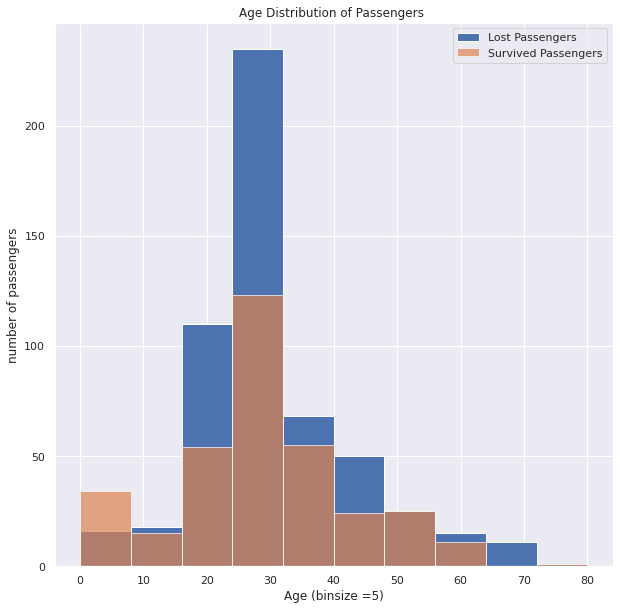

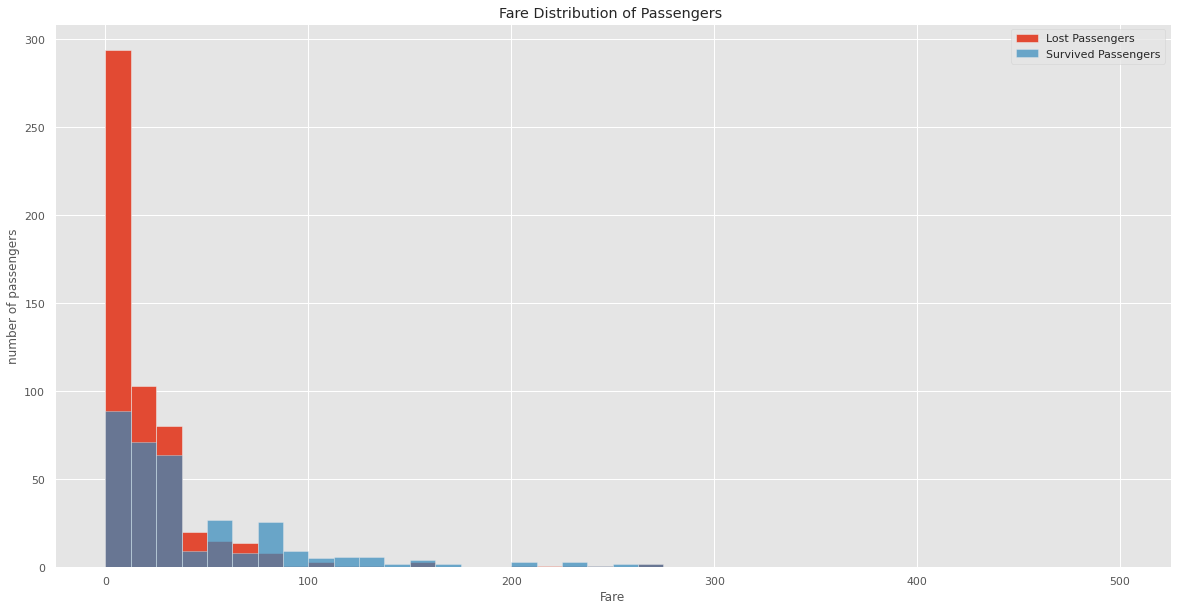

In [ ]:
Survived_Passengers= titanic.loc[(titanic['Survived'] == 1), :]

Lost_Passengers= titanic.loc[(titanic['Survived'] == 0), :]

plt.figure(figsize=[10,10])
plt.hist(Lost_Passengers.iloc[:,5,],10,range=(0, 80))
plt.hist(Survived_Passengers.iloc[:,5,],10,alpha=0.7,range=(0, 80))

plt.xlabel("Age (binsize =5)")
plt.ylabel("number of passengers")
plt.title ( "Age Distribution of Passengers ") 
plt.legend(["Lost Passengers", "Survived Passengers"])
#plt.xticks(np.arange(0, 80, 5))
plt.style.use('ggplot') 
plt.show()


plt.figure(figsize=[20,10])
plt.hist(Lost_Passengers.iloc[:,9,],40,range=(0, 500))
plt.hist(Survived_Passengers.iloc[:,9,],40,alpha=0.7,range=(0, 500))
plt.xlabel("Fare")
plt.ylabel("number of passengers")
plt.title ( "Fare Distribution of Passengers ") 
plt.legend(["Lost Passengers", "Survived Passengers"])
#plt.xticks(np.arange(0, 500, 25))
plt.show()



### **Question 7: Calculate and visualize the survival rate for discrete columns**
- Calculate the survival rate for column _SibSp_ and _Parch_.
- Use sns.barplot to visualize the survival rate for column _SibSp_ and _Parch_.

  SibSp_Value  Survival Rate
0           0           0.35
1           1           0.54
2           2           0.46
3           3           0.25
4           4           0.17
5           5           0.00
6           8           0.00
  Parch_Value  Survival Rate
0           0           0.34
1           1           0.55
2           2           0.50
3           3           0.60
4           4           0.00
5           5           0.20
6           6           0.00


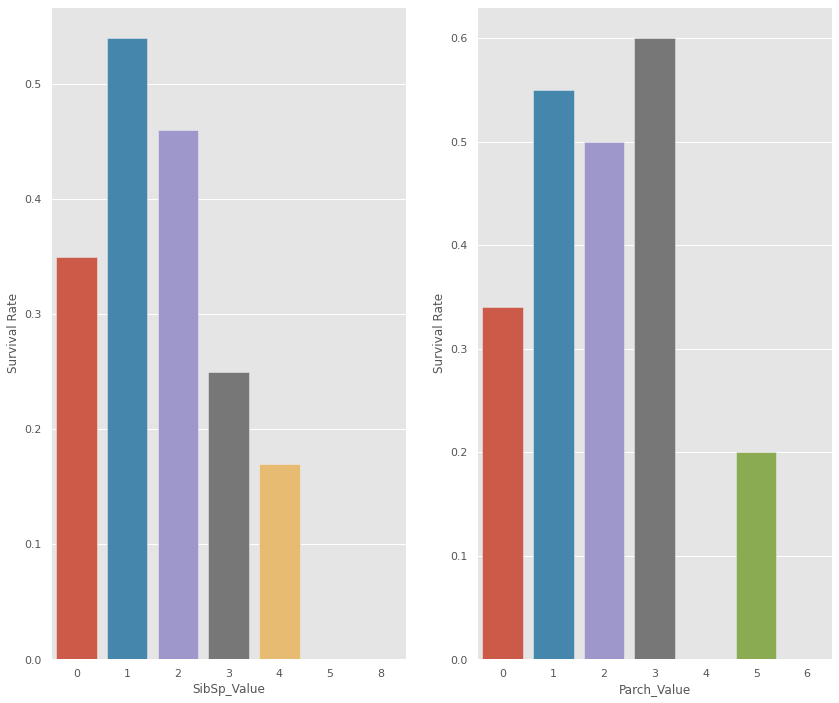

In [ ]:
# creating a pivot table for SibSp 

pivot2 = pd.pivot_table(titanic, values='Survived', 
                                columns='SibSp', 
                                aggfunc=[np.sum,'count'])
            
# creating a pivot table for Parch
pivot3 = pd.pivot_table(titanic, values='Survived', 
                                columns='Parch', 
                                aggfunc=[np.sum,'count'])

#calculating survival rate for SibSp
SR_SibSp0 = round(pivot2.iloc[0,0]/pivot2.iloc[0,7],2)
SR_SibSp1 = round(pivot2.iloc[0,1]/pivot2.iloc[0,8],2)
SR_SibSp2 = round(pivot2.iloc[0,2]/pivot2.iloc[0,9],2)
SR_SibSp3 = round(pivot2.iloc[0,3]/pivot2.iloc[0,10],2)
SR_SibSp4 = round(pivot2.iloc[0,4]/pivot2.iloc[0,11],2)
SR_SibSp5 = round(pivot2.iloc[0,5]/pivot2.iloc[0,12],2)
SR_SibSp8 = round(pivot2.iloc[0,6]/pivot2.iloc[0,13],2)


#calculating survival rate for Parch
SR_Parch0 = round(pivot3.iloc[0,0]/pivot3.iloc[0,7],2)
SR_Parch1 = round(pivot3.iloc[0,1]/pivot3.iloc[0,8],2)
SR_Parch2 = round(pivot3.iloc[0,2]/pivot3.iloc[0,9],2)
SR_Parch3 = round(pivot3.iloc[0,3]/pivot3.iloc[0,10],2)
SR_Parch4 = round(pivot3.iloc[0,4]/pivot3.iloc[0,11],2)
SR_Parch5 = round(pivot3.iloc[0,5]/pivot3.iloc[0,12],2)
SR_Parch6 = round(pivot3.iloc[0,6]/pivot3.iloc[0,13],2)


# initialize data of lists for SibSp
data1 = {'SibSp_Value':['0', '1', '2','3','4','5','8'],
        'Survival Rate':[SR_SibSp0 , SR_SibSp1 , SR_SibSp2,SR_SibSp3 ,SR_SibSp4 ,SR_SibSp5 ,SR_SibSp8 ]}
 
# Create DataFrame
Survival_Rate_SibSp  = pd.DataFrame(data1)
 

# initialize data of lists for PArch
data2 = {'Parch_Value':['0', '1', '2','3','4','5','6'],
        'Survival Rate':[SR_Parch0 , SR_Parch1 , SR_Parch2,SR_Parch3 ,SR_Parch4 ,SR_Parch5 ,SR_Parch6 ]}
 
# Create DataFrame
Survival_Rate_Parch  = pd.DataFrame(data2)


print(Survival_Rate_SibSp) 

print(Survival_Rate_Parch)

fig, (maxis1, maxis2) = plt.subplots(1, 2,figsize=(14,12))

sns.barplot(x = 'SibSp_Value', y = 'Survival Rate', data=Survival_Rate_SibSp,ax = maxis1)

sns.barplot(x = 'Parch_Value', y = 'Survival Rate', data=Survival_Rate_Parch,ax = maxis2)



### **Question 8: Find the correlations.**
Find the correlations between the feature and the target variable _Survived_ and use heatmap to visualize it. Summarize your findings.

### **Q8: Answer:**

My plan is to make a correlation matrix of every attribute against every attribute. This will fulfil the requirement of the question and provide even more insight. 

Upon examining the attributes, I can see that several of them should be dropped as they carry no meaning for a correlogram ( e.g. PassengerID, Cabin, Ticket,Nme) I will drop these columns.

The column "Embarked" and "Sex" are categorical. I can convert Sex to a binary and convert Embarked into three different binary columns. Each column will represent the Port of Embarcationan and the Correlogram will tell if each port is correlated with survival.


Findings: Sex, Passenger Class 1 & Fare have higher positive correlations with Survival. But truly, the correlation values are not very high - Sex (0.54) Passenger Class 1 (0.29) and Fare (0.26). 

In [ ]:
titanic_4_correlogram=titanic.copy() # make deep copy of titanic
titanic_4_correlogram['Sex'] = pd.factorize(titanic_4_correlogram['Sex'])[0] # encode Sex as binary. Female = 1
titanic_4_correlogram.Age = titanic_4_correlogram.Age.astype(int) # convert Age to integer and round to nearest year for simplicity
titanic_4_correlogram.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True) # Drop meaningless attributes
titanic_4_correlogram= pd.get_dummies(titanic_4_correlogram, columns=["Embarked","Pclass"]) # separate Embarked into 3 binary columns
titanic_4_correlogram.head()




,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,0,22,1,0,7.2500,0,0,1,0,0,1
1,1,1,38,1,0,71.2833,1,0,0,1,0,0
2,1,1,26,0,0,7.9250,0,0,1,0,0,1
3,1,1,35,1,0,53.1000,0,0,1,1,0,0
4,0,0,35,0,0,8.0500,0,0,1,0,0,1


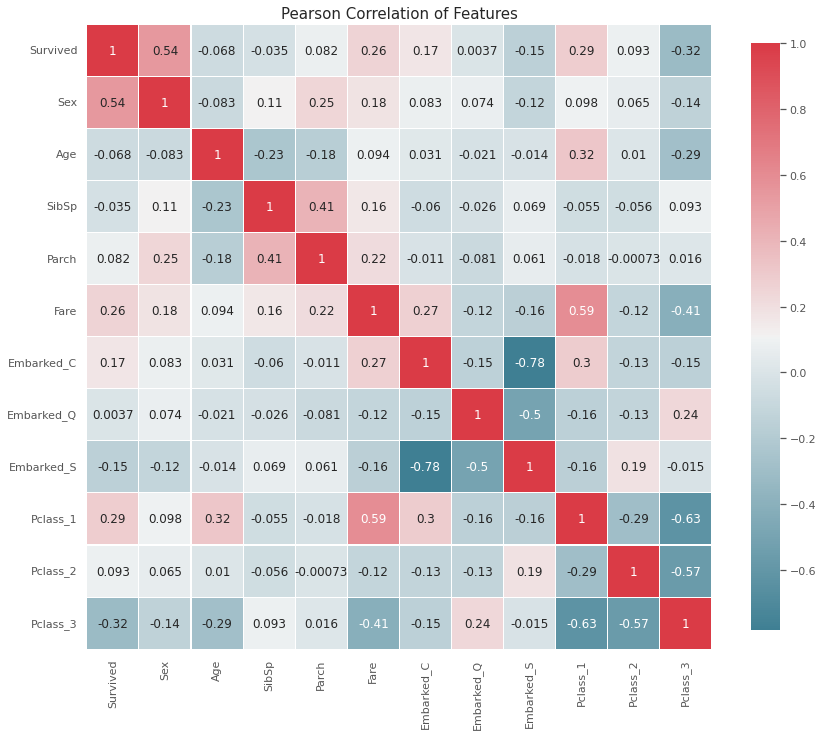

In [ ]:

def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(titanic_4_correlogram)

### **Question 9: Any other insights do you draw by analyzing the data? Summarize the findings as well as provide the code leading you to the findings.**


### **Q9 Answer: I used a Random Forest Model to see the important features of the dataset. An insight that has been appearing in the exploratory data analysis is reinforced by the feature selection in the random forest implemetation -- sex and fare are the top predictors of survival. While passenger class appears as a good predictor, however there is an intuitive colinearity relationship between fare and passenger class, passengers that paid higher fare are in the higher passenger class. The insight is profound as the correlation matrix did not exhibit significant correlation for gender/sex, however in the feature selection random forrest ensemble routine clearly found gender/sex to be the top predictor followed by fare. **

In [ ]:
#Read in Test & Validation data from Kaggle Provided Datasets and clean up

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

# Replace missing 'Age' values with mean
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
 
train.Age = imputer.fit_transform(train['Age'].values.reshape(-1,1))[:,0]     #I dont understand the reshape part of this code
 
 # Replace missing 'Cabin' values with value 'other'
imputer = SimpleImputer(missing_values=np.NaN, strategy='constant', fill_value='other')
train.Cabin = imputer.fit_transform(train['Cabin'].values.reshape(-1,1))[:,0]

# Replace missing 'Embarked' values with mode
imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
 
train.Embarked = imputer.fit_transform(train['Embarked'].values.reshape(-1,1))[:,0] 

train.isna().sum()  # all missing data is now filled

FileNotFoundError: ignored

In [ ]:
#Clean up Test Data 

test_x= test.copy() #create deep copy

# Replace missing 'Age' values with mean
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
 
test.Age = imputer.fit_transform(test['Age'].values.reshape(-1,1))[:,0]     #I dont understand the reshape part of this code

# Replace missing 'Fare' values with mean
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
 
test.Fare = imputer.fit_transform(test['Fare'].values.reshape(-1,1))[:,0]     #I dont understand the reshape part of this code
 
 # Replace missing 'Cabin' values with value 'other'
imputer = SimpleImputer(missing_values=np.NaN, strategy='constant', fill_value='other')
test.Cabin = imputer.fit_transform(test['Cabin'].values.reshape(-1,1))[:,0]

# Replace missing 'Embarked' values with mode
imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
 
test.Embarked = imputer.fit_transform(test['Embarked'].values.reshape(-1,1))[:,0] 

test_x['Sex'] = pd.factorize(test_x['Sex'])[0] # encode Sex as binary. Female = 1
test_x.Age = test_x.Age.astype(int, errors='ignore') # convert Age to integer and round to nearest year for simplicity
test_x.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True) # Drop meaningless attributes
test_x= pd.get_dummies(test_x, columns=["Embarked","Pclass"]) # separate Embarked into 3 binary columns



test_x.head()
test_x.isna().sum()

In [ ]:
train_y=train["Survived"]  # Separate Target 

train_x= train.copy() #create deep copy
train_x['Sex'] = pd.factorize(train_x['Sex'])[0] # encode Sex as binary. Female = 1
train_x.Age = train_x.Age.astype(int) # convert Age to integer and round to nearest year for simplicity
train_x.drop(["PassengerId","Name","Ticket","Cabin","Survived"],axis=1,inplace=True) # Drop meaningless attributes
train_x= pd.get_dummies(train_x, columns=["Embarked","Pclass"]) # separate Embarked into 3 binary columns
train_x.head()


In [ ]:
# TODO: fine-tune Random Forest classifier using grid search with cross-validation (GridSearchCV).

parameters= {

"n_estimators": [5,10,20],
"max_depth": [2,3,4,5],
"min_samples_split": [0.001,0.01]
}

rfc_grid = GridSearchCV(RandomForestClassifier(random_state=0),parameters, cv=3)
rfc_grid.fit(train_x,train_y)

# summarize the results of the grid search
print("The best score is {}".format(rfc_grid.best_score_))
print("The best hyper parameter setting is {}".format(rfc_grid.best_params_))

In [ ]:
#Run RandomForestClassifier with best parameters:

my_rfc=RandomForestClassifier(max_depth=4, min_samples_split= 0.01, n_estimators=10)
my_rfc.fit(train_x,train_y)

In [ ]:
feature_imp = pd.Series(my_rfc.feature_importances_, index=train_x.columns).sort_values(ascending=False)

#print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

In [ ]:
# TODO: make prediction and evaluate the model performance on test data

test_z = pd.DataFrame(my_rfc.predict(test_x),columns=['Survived'])

#test_z.to_csv("Test_z", index=False)  # submitted this to kaggle and got ~77% accuracy



### **Bonus Point: Build a ML model to predict survival.**
Can you build a logistic regression model to predict the probability of survival for all the passengers in this [file](https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv)? You can evaluate your model accuracy on [Kaggle](https://www.kaggle.com/c/titanic). Can you think of any other ways to improve the model performance? Implement your idea to see if it actually works. 

This is a basic implementation of logistic regression. It is interesting to note that logistic regression without tuning underperforms in comparison to random forrest. I could use my insights from random forrest to only use the important feature to improve the model performance. I have run out of time to try more model tweaks, but i believe that the insight is that all the predictors are not equivally valuable. 

In [ ]:
# Logistic Regression

log_reg = LogisticRegression()
log_reg.fit(train_x, train_y)
y_pred =log_reg.predict(test_x)
y_pred = pd.DataFrame(y_pred)  # submitted this as is to Kaggle and got 49% accuracy :(



